***
***

# **COVID-19 Vaccination Progress**

## *3) Basic Visualisations of Data Distribution*

***
***

## Table of Contents

| 1. INTRODUCTION | 2. Visualisations | 3. SUMMARY |
|----|----|----|
| *1.1 Dataset Characteristics* | *2.1 Importing Libraries and Data* | 3.1 Key Findings |
| | *2.2 Basic Visualisations* | |

***
***

## 1. INTRODUCTION

In this notebook we use the cleaned/ feature-engineered dataset generated in notebook 1 (Initial Data Exploration, Cleaning and Feature Engineering) to begin our visual inspection of the data. The focus of this notebook will be on the distribution of the data (w/o taking temoral ordering into account).

***

### 1.1 Dataset Characteristics

1) Our PROCESSED dataframe contains the following:

| FEATURE | description | comment |
|----|----|----|
| **date** | data entry (13th December 2020 to 24th March 2021) | - |
| **weekday** | day of week (e.g. Monday) | NEW column added during feature engineering |
| **country** | 147 countries | 4 duplicates removed, UN recognises 197 countries (193 are members) |
| **country_grouped** | 17 countries/groups | NEW column added during feature engineering |
| **4 x vaccine type columns** | inactivated_virus, recombinant, rna, protein | NEW columns added during feature engineering |
| **10 x vaccine columns** | name/company | NEW columns added during cleaning to replace vaccines column |
| **daily_vaccinations** | no. of vaccination for that date/country | some days only daily vaccinations, some days only the (cummulative) total |
| **daily_vaccinations_per_million** | ratio (in ppm) between vaccination number and total population for the current date in the country | - |
| **daily_vaccinations_per_hundred** | ratio (in percent) between vaccination number and total population for the current date in the country | NEW column added during feature engineering |
| **total_vaccinations** | absolute number of immunisations (jabs) in the country | some days only daily vaccinations, some days only the (cummulative) total |
| **total_vaccinations_per_hundred** | ratio (in percent) between vaccination number and total population up to the date in the country | - |
| **people_vaccinated** | total no. of people with immunisation (partial and full) | - |
| **people_vaccinated_per_hundred** | ratio (in percent) between population immunized (partial and full) and total population | - |
| **people_fully_vaccinated** | total no. of people with full immunisation (typically 2) | - |
| **people_fully_vaccinated_per_hundred** | ratio (in percent) between population fully immunized and total population | - |
| **people_partially_vaccinated** | total no. of people with partial immunisation (i.e. 1 jab) | NEW column added during feature engineering |
| **people_partially_vaccinated_per_hundred** | ratio (in percent) between population partially immunized and total population | NEW column added during feature engineering |

***
***

## 2. IMPORTS AND DATA PREPARATION

***

### 2.1 Importing Libraries and Data

+ Import numpy (linear algebra), pandas (data processing) and visualisation libraries (matplotlib, seaborn, plotly).
+ Import original and processed (notebook 1) dataset on COVID-19 vaccination progress.

In [1]:
#Import basic libraries
import numpy as np
import pandas as pd

#Libraries for visualization
import matplotlib.pyplot as plt
import matplotlib.colors
import matplotlib.dates as mdates
import seaborn as sns

#Suppress pandas future warnings
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

#Plot settings
%matplotlib inline

In [2]:
#Import original and processed (notebook 1) datasets
#Import local Kaggle dataset (version 81, March 2021) country_vaccinations on COVID-19 vaccination progress and set date to datetime
df = pd.read_csv('data/country_vaccinations.csv', parse_dates=['date'])

#Alternatively load updated Kaggle dataset country_vaccinations on COVID-19 vaccination progress from url
#df = pd.read_csv('https://www.kaggle.com/gpreda/covid-world-vaccination-progress/download', parse_dates=['date'])

#Import processed dataframe from notebook 1
df_processed = pd.read_csv('data/df_processed.csv', parse_dates=['date'])

***

### 2.2 Basic Visualisations

In this section the basic characteristics of the data were explored focussing on investigating the distribution of the data without taking the temporal ordering into account:
+ No. of observations per date, specifically how many datapoints every 2 weeks
+ No. of observations per country/country-grouped
+  No. of observations per vaccine/vaccine type
+ Distribution of numbers of daily vaccinations (independent of time and country)

**TASK 1**:

Take a look at the distribution of the data over the entire time-span covered.

**KEY FINDING**:

The plot shows that back in December 2020 few countries were vaccinating thus relatively few observations were collected over the course of 2 weeks. The number of observations per 2 weeks increased almost continuously over time (albeit with a slight dip around mid-March), suggesting more and more countries started to vaccinate, resulting in more observations per date. Overall, this leads to a highly left-skewed distribution.

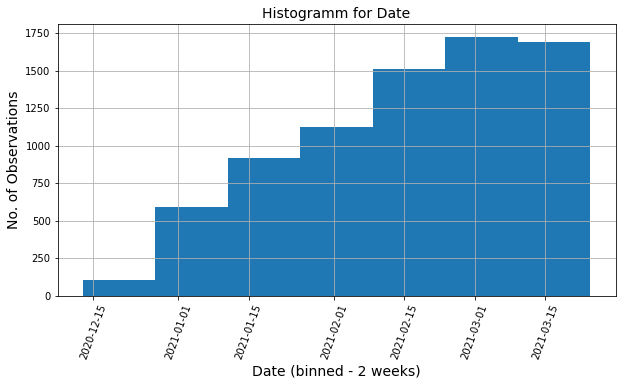

In [3]:
#Simple histogramm of distribution of data over date
plt.figure(figsize=(10, 5))
plt.xlabel('Date (binned - 2 weeks)', fontsize=14)
plt.ylabel('No. of Observations', fontsize=14)
plt.title('Histogramm for Date', fontsize=14)
plt.xticks(rotation=70)

df_processed.date.hist(bins=7)

plt.show();

**TASK 2**:

Take a look at the distribution of the individual countries (or regions/ groups thereof) over the entire time-span covered.

**KEY FINDING**:

Here we can see that Canada, UK, and China have the largest number of observations, i.e. dates for which vaccination data is available (covering more or less the entire time-span of the dataset (101 days)). In addition, the countries Laos, Bahamas and Guinea have the lowest number of entries.

When we look at the regions/grouped countries (with specific countries viewed individually - see notebook 1 for details) we can see that UK & British Overseas has the highest number of observations. On the other hand Japan has the lowest number of observations.

In [4]:
#First, quickly check for duplicates per country/date
check_dc = df_processed.duplicated(subset=['date','country'], keep=False).sum()
print(f'SPOTCHECK: The number of duplicates per date-country group are: {check_dc}.')

SPOTCHECK: The number of duplicates per date-country group are: 0.


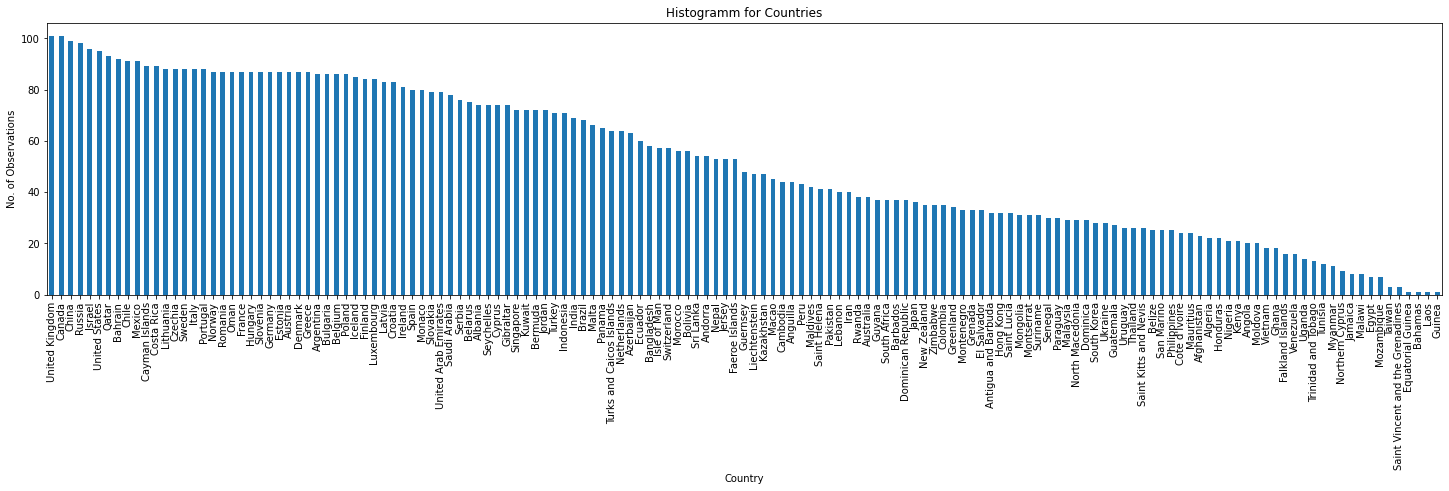

In [5]:
#Simple histogramm of distribution of country
plt.figure(figsize=(25, 5))
plt.xlabel('Country')
plt.ylabel('No. of Observations')
plt.xticks(rotation=90, fontsize=10)
plt.title('Histogramm for Countries')

df_processed.country.value_counts().plot.bar()

plt.show();

In [6]:
#Check countries with highest and lowest no. of observations
c_high = len(df_processed[df_processed['country']=='Canada'])
c_low = len(df_processed[df_processed['country']=='Guinea'])
print(f'SUMMARY: \n The country with the largest number of observations has {c_high} observations, \n whereas the counrtry with the lowest no. of observations has {c_low} entry/ies.')

SUMMARY: 
 The country with the largest number of observations has 101 observations, 
 whereas the counrtry with the lowest no. of observations has 1 entry/ies.


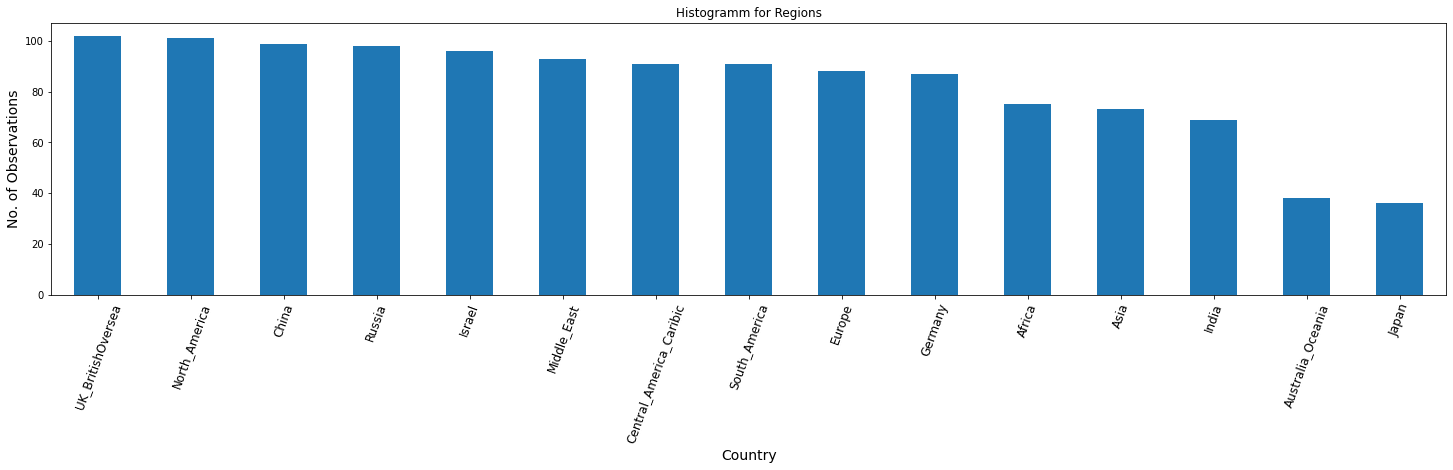

In [7]:
#Simple histogramm of distribution of country
plt.figure(figsize=(25, 5))
plt.xlabel('Country', fontsize=14)
plt.ylabel('No. of Observations', fontsize=14)
plt.title('Histogramm for Regions')

filtered_cg = df_processed[['date', 'country_grouped']].drop_duplicates()
filtered_cg.country_grouped.value_counts().plot.bar()

plt.xticks(rotation=70, fontsize=12)
plt.show();

**TASK 3**:

Take a look at the distribution of the vaccines and vaccine types over the entire time-span covered.

**KEY FINDING**:

Most observations (not countries) are linked to the usage of the 3 vaccines: Pfizer/BioNtech and Oxford/AstraZeneca (followed by Moderna). The countplot for individual vaccines shows that Pfizer/BioNtech were reported most often, followed by Oxford/AstraZeneca and Moderna, whereas Covaxin, EpiVacCorona, Johnson & Johnson and Sinopharm (Wuhan) were reported very few times. It should be noted that this only reflects the number of days on which individual countries reported the usage of these vaccines. By no means can we conclude anything about how many doses of these vaccines were, neither absolute, nor relative to each other. With respect to the types of vaccines it can be noted that recombinant viral vector based vaccines (in total 4 vaccines) and messenger RNA based vaccines (in total 2 vaccines) have been reported on the largest number of days by the largest number of countries. But again we cannot infer anything with respect to the actual number of doses administered.

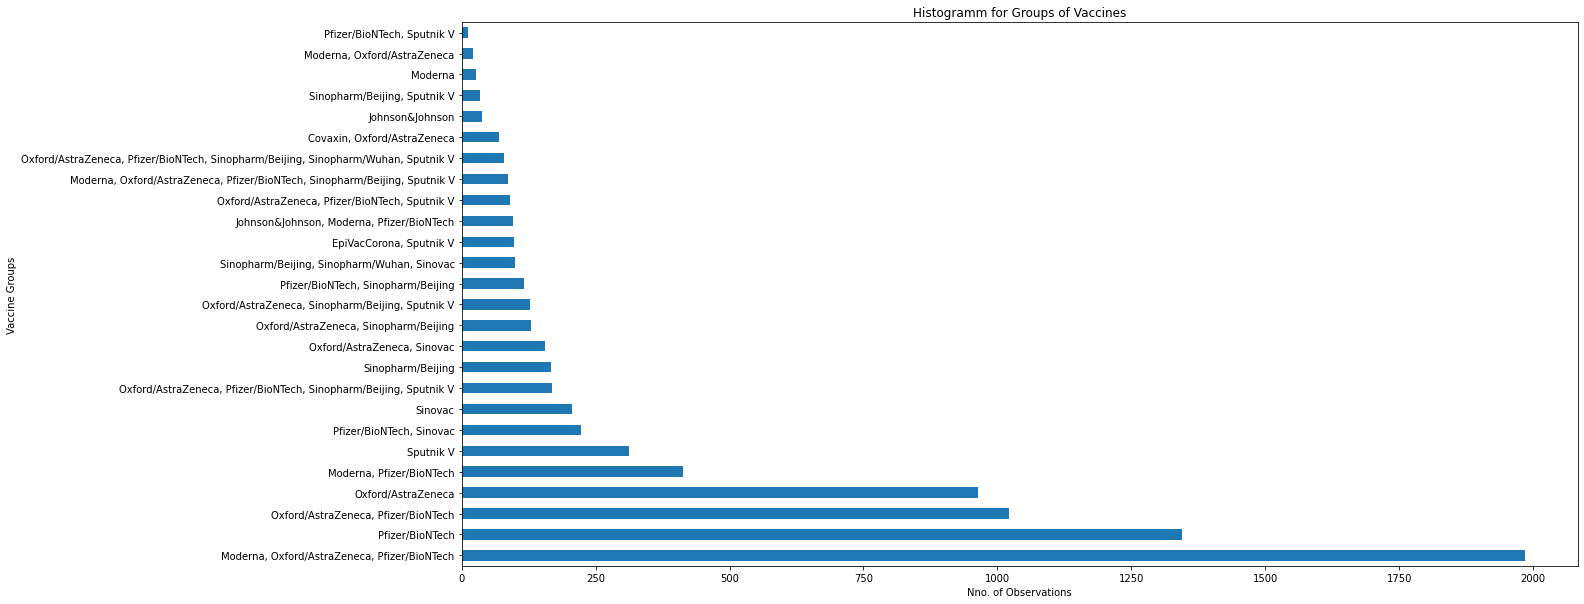

In [8]:
#Simple histogramm of distribution of groups of vaccines used (as groups supplied as string in original dataframe)
#NOTE: This may change per country over time, as cummulative
plt.figure(figsize=(20, 10))
plt.xlabel('Nno. of Observations')
plt.ylabel('Vaccine Groups')
plt.title('Histogramm for Groups of Vaccines')

df.vaccines.value_counts().plot.barh()

plt.show();

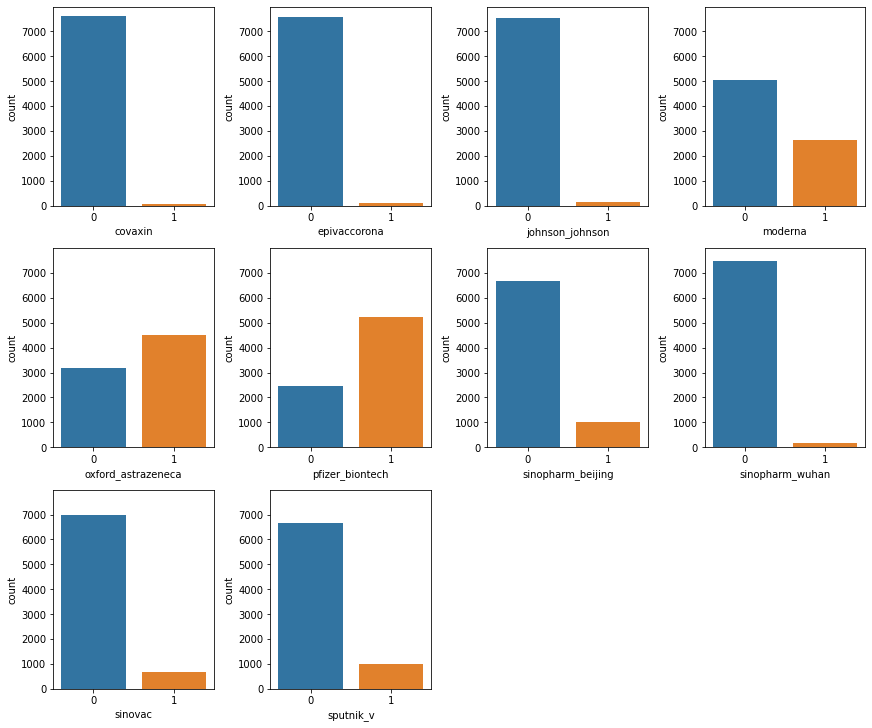

In [9]:
# Seaborn countplots for individual vaccines
fig, ax = plt.subplots(nrows=3, ncols=4, figsize=(12,10), constrained_layout=True)
ax[2,2].set_visible(False), ax[2,3].set_visible(False)

sns.countplot(x='covaxin', data=df_processed, ax=ax[0,0])
sns.countplot(x='epivaccorona', data=df_processed, ax=ax[0,1])
sns.countplot(x='johnson_johnson', data=df_processed, ax=ax[0,2])
sns.countplot(x='moderna', data=df_processed, ax=ax[0,3])
sns.countplot(x='oxford_astrazeneca', data=df_processed, ax=ax[1,0])
sns.countplot(x='pfizer_biontech', data=df_processed, ax=ax[1,1])
sns.countplot(x='sinopharm_beijing', data=df_processed, ax=ax[1,2])
sns.countplot(x='sinopharm_wuhan', data=df_processed, ax=ax[1,3])
sns.countplot(x='sinovac', data=df_processed, ax=ax[2,0])
sns.countplot(x='sputnik_v', data=df_processed, ax=ax[2,1])

plt.setp(ax, ylim=ax[0,0].get_ylim())
plt.show();

In [10]:
#Quick check to see how many observations there really are for the vaccines with the lowest number of observations
check_c = df_processed.covaxin.isin([1]).sum(axis=0)
print(f'SPOTCHECK: The number of observations that report Covaxin is {check_c}.')
check_c = df_processed.epivaccorona.isin([1]).sum(axis=0)
print(f'SPOTCHECK: The number of observations that report EpiVacCorona is {check_c}.')
check_c = df_processed.johnson_johnson.isin([1]).sum(axis=0)
print(f'SPOTCHECK: The number of observations that report J&J is {check_c}.')
check_c = df_processed.sinopharm_wuhan.isin([1]).sum(axis=0)
print(f'SPOTCHECK: The number of observations that report Sinopharm (W) is {check_c}.')

SPOTCHECK: The number of observations that report Covaxin is 69.
SPOTCHECK: The number of observations that report EpiVacCorona is 98.
SPOTCHECK: The number of observations that report J&J is 132.
SPOTCHECK: The number of observations that report Sinopharm (W) is 178.


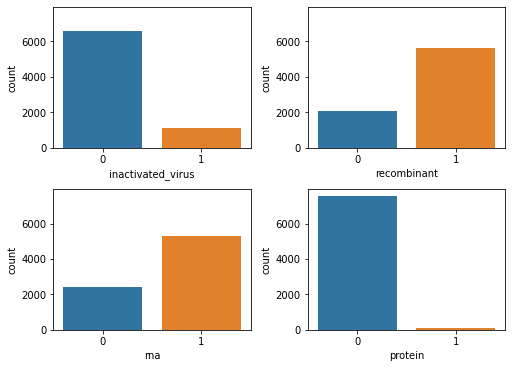

In [11]:
#Seaborn countplots for 4 different vaccination types
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(7,5), constrained_layout=True)

sns.countplot(x='inactivated_virus', data=df_processed, ax=ax[0,0])
sns.countplot(x='recombinant', data=df_processed, ax=ax[0,1])
sns.countplot(x='rna', data=df_processed, ax=ax[1,0])
sns.countplot(x='protein', data=df_processed, ax=ax[1,1])

plt.setp(ax, ylim=ax[1,1].get_ylim())
plt.show();

In [12]:
#Quick check to see how many observations there really are for recombinant versus rna
check_c = df_processed.recombinant.isin([1]).sum(axis=0)
print(f'SPOTCHECK: The number of observations for recombinant viral vectors is {check_c}.')
check_c = df_processed.rna.isin([1]).sum(axis=0)
print(f'SPOTCHECK: The number of observations for messenger RNA is {check_c}.')

SPOTCHECK: The number of observations for recombinant viral vectors is 5607.
SPOTCHECK: The number of observations for messenger RNA is 5278.


In [13]:
#Quick check to see how many observations are linked to the use of a protein subunit based vaccine
check_p1 = df_processed.protein.isin([1]).sum(axis=0)
check_p2 = df_processed.protein.isin([0]).sum(axis=0)
print(f'SPOTCHECK: The number of YES (1) for protein subunit based vaccines are: {check_p1} [compared to NO (0): {check_p2}].')

SPOTCHECK: The number of YES (1) for protein subunit based vaccines are: 98 [compared to NO (0): 7577].


**TASK 4**:

Finally, let's take a look at the distribution of the number of daily vaccinations per country over the entire time-span covered.

**KEY FINDING**:

As suspected a histogramm displaying the daily vaccination numbers is highly right skewed, therefore a log scale was chosen and diplays a normal distribution. The skewdness is caused by a few very large countries (e.g. USA) with large numbers of daily vaccinations as compared to a large number of small countries, which will not reach such high numbers, even if they proportionally vaccinate a large percentage of the population each day.

For all features pertaining to actual (or percentage) vaccination numbers a more detailed analysis is required, especially also taking the temporal-component into account. This will be carried out in the next couple of notebooks.

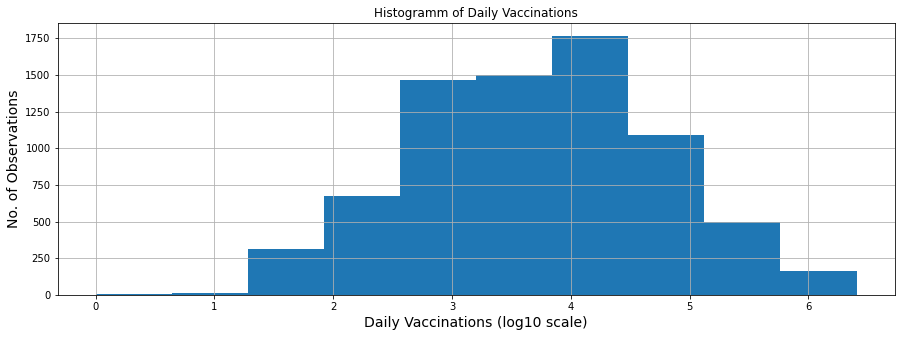

In [14]:
#Simple histogramm of distribution of daily vaccination using log10 scale
plt.figure(figsize=(15, 5))
plt.xlabel('Daily Vaccinations (log10 scale)', fontsize=14)
plt.ylabel('No. of Observations', fontsize=14)
plt.ticklabel_format(style='plain')
plt.title('Histogramm of Daily Vaccinations')

np.log10(df_processed.daily_vaccinations).hist(bins=10)

plt.show();

***
***

## 3. SUMMARY

***

### 3.1 Key Findings

1) Vaccinations startet slowly in December 2020, continuously increasing over time up to the last entries in the dataset in March (apart from a slight dip at the end).

1) Canada, UK, and China have the largest number of dates, with Canada having 101 observations. In contrast, Laos, Bahamas and Guinea have the lowest number of entries, with Guinea having only 1 observation.

1) Most observations (not countries) are linked to the usage of the 3 vaccines: Pfizer/BioNtech and Oxford/AstraZeneca [around 4500 to 5500 observations each] (followed by Moderna). In contrast the smallest number of entries are associated with Covaxin (69 observations) and EpiVacCorona (98 observations, protein subunit). The most reported types of vaccines are recombinant viral vectors (5607 observations) and messenger RNA (5278 observations).

***